In [18]:
import logging
import backtrader as bt
from datetime import datetime

from Commissions import CommInfo_Futures_Perc_Mult
from Parser import parse_args
from Datasets import *
from Strategies import StochMACD
from utils import print_sqn, print_trade_analysis

def runstrat(args=None):
    leverage = 5
    
    cerebro = bt.Cerebro(optreturn=False)
    cerebro.broker.set_shortcash(False)
    cerebro.broker.set_cash(5000)
    cerebro.broker.setcommission(commission=0.0002, leverage=leverage)

    dataname = DATASETS.get('btc_hourly')
    data = bt.feeds.GenericCSVData(
        dataname=dataname,
        fromdate=datetime(2018,2,1),
        todate=datetime(2021,6,9),
        timeframe=bt.TimeFrame.Minutes,
        nullvalue=0.0,
        datetime=0,
        open=4,
        high=5,
        low=6,
        close=7,
        volume=8,
        compression=60,
        headers=True,
    )

    cerebro.adddata(data)

    # cerebro.addsizer(bt.sizers.SizerFix, stake=args.stake)
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=args.cashperc)

    # cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio', timeframe=bt.TimeFrame.Minutes, compression=60)
    # cerebro.addanalyzer(bt.analyzers.Returns, _name='returns', timeframe=bt.TimeFrame.Minutes, compression=60)
    cerebro.addanalyzer(bt.analyzers.VWR, _name='vwr', timeframe=bt.TimeFrame.Minutes, compression=60)
    
    cerebro.addobserver(bt.observers.Value)
    
    cerebro.addstrategy(StochMACD, 
        macd1=9,
        macd2=21,
        macdsig=8,
        atrdist=5,
        reversal_sensitivity=18,
        leverage=leverage,
#         loglevel=logging.INFO,
    )

    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
    cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

    initial_value = cerebro.broker.getvalue()
    print('Starting Portfolio Value: %.2f' % initial_value)
    result = cerebro.run()

    # Print analyzers - results
    final_value = cerebro.broker.getvalue()
    print('Final Portfolio Value: %.2f' % final_value)
    print('Profit %.3f%%' % ((final_value - initial_value) / initial_value * 100))
    print_trade_analysis(result[0].analyzers.ta.get_analysis())
    print_sqn(result[0].analyzers.sqn.get_analysis())
    
    return cerebro

cerebro = runstrat()


Starting Portfolio Value: 5000.00
cerebro cash 5000.0
size 1.4343086632243258
cerebro cash 2870.620480684481
size 1.1133046757549372
cerebro cash 895.3987259595076
size 0.28264062794652095
cerebro cash 447.25166361677407
size 0.14364417859177328
cerebro cash 709.0780670466737
size 0.15583023693404552
cerebro cash 1093.4232367456927
size 0.27158993145212146
cerebro cash 1104.6509696583187
size 0.2708805712747226
cerebro cash 1466.7003941658213
size 0.36968842892562814
cerebro cash 733.2437253366262
size 0.22956910624189925
cerebro cash 2022.1176117128607
size 0.7390780744564549
cerebro cash 1010.047747050574
size 0.37228713077149506
cerebro cash 1556.909455685622
size 0.49944357264571704
cerebro cash 2080.9853784506213
size 0.5853969245349202
cerebro cash 1039.4521965360852
size 0.28104301265362375
cerebro cash 2180.565734205008
size 0.5880801022144392
cerebro cash 1089.1925842354017
size 0.29216539276700687
cerebro cash 1603.7461644915054
size 0.4086252335167271
cerebro cash 1488.79279

<IPython.core.display.Javascript object>


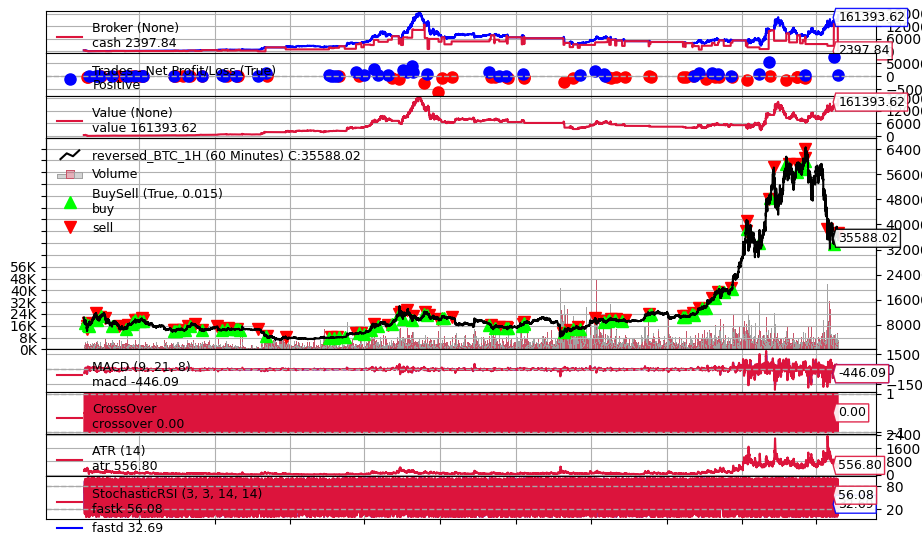

[[<Figure size 640x480 with 9 Axes>]]

In [19]:
cerebro.plot()